## Baseline ML Models: KNN

#### Imports

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image

In [13]:
from utils.helpers import *

#### Loading the training dataset (2D vectors and groundtruths)

In [16]:
# Loaded a set of images
root_dir = "data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 10 # Only use 10 images for training

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png


In [17]:
# Extract patches and labels for each input image
patch_size = 16 # each patch is 16*16 pixels
img_patches, Y = extract_patches_labels(imgs, gt_imgs, patch_size, 0, n)
# Compute features for each image patch
X = np.asarray([extract_features_2d(img_patches[i]) for i in range(len(img_patches))])

In [18]:
# Print feature statistics

print('Computed ' + str(X.shape[0]) + ' features')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')

Computed 6250 features
Feature dimension = 2
Number of classes = 1
Class 0: 4422 samples
Class 1: 1828 samples


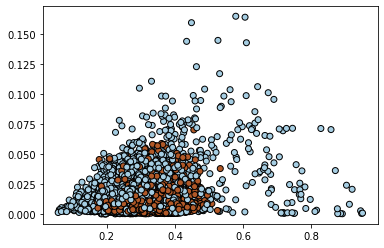

In [19]:
# Plot 2d features using groundtruth to color the datapoints
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

## KNN

#### Optimal hyerparameter for KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### choosing an optimal k in KNN using cross-validation
sqrt_n = int(np.sqrt(X.shape[0]))
# Optimal k is usually about the square root of n
k_range = range(sqrt_n - 25, sqrt_n + 20, 2)
# Selecting the best k using cross-validation
f1_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring="f1")
    f1_scores.append(scores.mean())

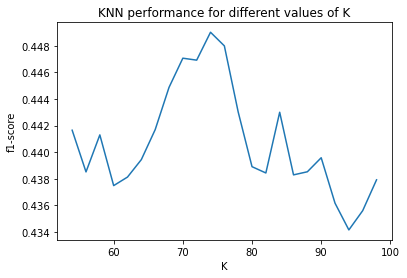

In [21]:
#### Plotting f1-score for each value of K studied with corss validation
plt.plot(k_range, f1_scores)
plt.xlabel("K")
plt.ylabel("f1-score")
plt.title("KNN performance for different values of K")
plt.show()

In [22]:
# Best value for K in K-NN
K_optimal = k_range[f1_scores.index(max(f1_scores))]
print("Best value for K: {}".format(K_optimal))

Best value for K: 74


#### Testing KNN on one image 

True positive rate = 0.0576


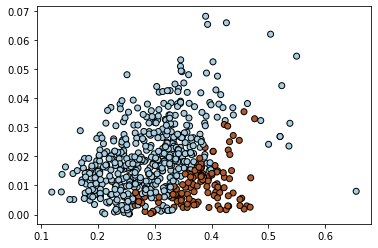

In [23]:
# Loading test image
img_idx = 12
Xi = extract_img_features(image_dir + files[img_idx], patch_size)

# Training an all the other images of the dataset
knn_optimal = KNeighborsClassifier(n_neighbors=K_optimal)
knn_optimal.fit(X, Y)

# Running Prediction for the test image
Zi = knn_optimal.predict(Xi)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Zi)[0]
Yn = np.nonzero(Y)[0]
TPR = len(list(set(Yn) & set(Zn))) / float(len(Zi))
print('True positive rate = ' + str(TPR))

# Plot features using predictions to color datapoints
plt.scatter(Xi[:, 0], Xi[:, 1], c=Zi, edgecolors='k', cmap=plt.cm.Paired)

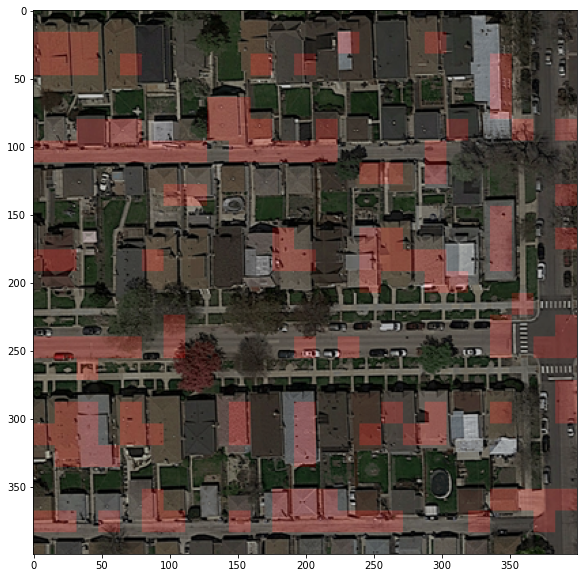

In [24]:
# Display prediction as an image

w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size
plt.imshow(cimg, cmap='Greys_r')

new_img = make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)